Ομάδα 4

Νίκος Χάιδος, AM: 03118096

Αργύρης Μανέτας, AM:            03117019

Ελευθέριος Λυμπερόπουλος, AM:   03117061

### Γενικά για το Dataset

Το dataset U02 αφορά μετρήσεις που έγιναν σε διακυμάνσεις από εγκεφαλογραφήματα. Με βάση αυτές τις μετρήσεις, ο classifier αποφασίζει αν ο άνθρωπος είναι σε κατάσταση Ηρεμίας (Relax) ή σε Σκεπτόμενος (Planning). 

Το αρχείο το διαβάσαμε με την συνάρτηση open() της Python, χωρίς να χρειαστούν μεταβολές στον τύπο του (txt).

Συνολικά, περιέχει 182 δείγματα, με το κάθε ένα να έχει 12 χαρακτηριστικά. Όλα τα χαρακτηριστικά είναι διατεταγμένα, τύπου real.

Στο αρχικό .txt αρχείο, δεν υπήρχε κάποια επικεφαλίδα ή αρίθμηση των γραμμών.

Οι κλάσεις παίρνουν τις τιμές 1 και 2, και βρίσκονται στην τελευταία (13η) κολώνα του txt αρχείου.

Δεν υπήρχε κάποια απουσιάζουσα ή NaN τιμή.

Το πλήθος των τιμών ανά κλάση (όπως υπολογίζεται και παρακάτω) είναι:
 - 130 για την κλάση 1
 - 52 για την κλάση 2

Εφόσον 130/52 = 2.5 > 1.5, το dataset δεν είναι ισορροπημένο.

In [ ]:
#Update των βιβλιοθηκών

!pip install -U numpy
!pip install -U pandas
!pip install -U matplotlib
!pip install -U sklearn
!pip install -U imbalanced-learn
!pip install -U optuna

     |████████████████████████████████| 15.7 MB 15.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 11.3 MB 9.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


     |████████████████████████████████| 11.2 MB 14.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 308 kB 15.4 MB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 209 kB 58.5 MB/s 
     |████████████████████████████████| 75 kB 4.7 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 149 kB 61.8 MB/s 
     |████████████████████████████████| 112 kB 60.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=6c6e89b19b7d81ef8d8e361767a66cff791cf8204caf5a3ef9a19dc7f65bd269
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
import numpy as np

# Ανάγνωση του αρχείου σε numpy array

f = open('/content/gdrive/My Drive/Neural Networks/plrx.txt', 'r')
lines =f.readlines()
y_train = []
x_train = []


for line in lines:
  words = line.split()
  y_train.append(float(words[12]))
  x_train.append([float(x) for x in words[:12]])

X_train = np.array(x_train)
Y_train = np.array(y_train)

print(f'Το shape του συνολικού dataset (χωρίς τα labels) είναι {X_train.shape}.')

class_count = np.bincount(Y_train.astype(int))
print(f'Η κλάση 1 περιέχει {class_count[1]} στοιχεία, και η κλάση 2 περιέχει {class_count[2]} στοιχεία.')

Το shape του συνολικού dataset (χωρίς τα labels) είναι (182, 12).
Η κλάση 1 περιέχει 130 στοιχεία, και η κλάση 2 περιέχει 52 στοιχεία.


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.30)

print(f'Το shape του train set είναι {x_train.shape}.')
print(f'Το shape του test set είναι {x_test.shape}.')

Το shape του train set είναι (127, 12).
Το shape του test set είναι (55, 12).


In [ ]:
#Συνάρτηση που φτιάχνει τους πίνακες σύγχυσης
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats



        stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

#Dummy

---



<h1>Out of the box metrics</h1>

Παρακάτω υλοποιούμε δύο Dummy Classisifiers. <br>
Ο πρώτος έχει στρατηγική υλοποίησης most_frequent, που σημαίνει ότι προβλέπει πάντα την πιο συχνή κλάση που του δόθηκε στα train δεδομένα, δηλαδή στην περίπτωσή μας θα προβλέπει την κλάση 1. <br>
Ο δέυτερος έχει στρατηγική υλοποίησης stratified, που σημαίνει ότι προβλέπει τις κλάσεις με την κατανομή που δίνονται στα train δεδομένα, δηλαδή αφού τα δεδομένα που μας έχουν δοθεί χωρίζονται περίπου κατά 70% στην κλάση 1 και 30% στην κλάση 2, περιμένουμε αυτός ο classifier να προβλέπει κοντά στα 70% των περιπτώσεων την κλάση 1 και κοντά στα 30% των περιτώσεων την κλάση 2.<br>
Παρακάτω βλέπουμε τα accuracy και τα f1 scores των δύο dummy classifiers.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

dummy_freq = DummyClassifier(strategy="most_frequent")
dummy_freq.fit(x_train, y_train)
preds = dummy_freq.predict(x_test)

print("Dummy Classifier with most_frequent strategy scores:")
print("F1: {}".format(f1_score(preds, y_test)))
print("Accuracy: {}".format(accuracy_score(preds, y_test)))

print("Dummy Classifier with stratified strategy scores:")

dummy_str = DummyClassifier(strategy="stratified")
dummy_str.fit(x_train, y_train)
preds = dummy_str.predict(x_test)

print("F1: {}".format(f1_score(preds, y_test)))
print("Accuracy: {}".format(accuracy_score(preds, y_test)))

Dummy Classifier with most_frequent strategy scores:
F1: 0.8421052631578948
Accuracy: 0.7272727272727273
Dummy Classifier with stratified strategy scores:
F1: 0.6111111111111112
Accuracy: 0.4909090909090909


Όπως φαίνεται, επειδή το dataset είναι πολύ imbalanced, το να προβλέπει ο ταξινομητής απλά την κλάση 1 δίνει καλύτερα αποτελέσματα από το να προσπαθεί να προβλέψει με βάση την κατανομή των κλάσεων 1 και 2. 

<h1>Pipelines με τους Classifiers</h1>
Παρακάτω κατασκευάζουμε διάφορα Pipelines με στρώματα για feature selection, scaling, oversampling, dimensionality reduction για τους dummy classifiers. Eφαρμόζουμε τον αλγόριθμο GridSearch ώστε να βελτιστοποιήσουμε την επίδοση των classifiers ρυθμίζοντας κατάλληλα τις παραμέτρους τους. Πάντα το accuracy και το f1 score υπολογίζεται με 10-fold cross-validation. 

In [ ]:
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.exceptions import FitFailedWarning
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FitFailedWarning)
simplefilter(action='ignore', category=UserWarning)

selector = VarianceThreshold()
scaler = StandardScaler()
mmscaler = MinMaxScaler()
ros = RandomOverSampler()
pca = PCA()
sm = SMOTE()

Στο παρακάτω block κατασκευάζεται pipeline με Dummy Classifier με most_frequent strategy.

In [ ]:
dummy = DummyClassifier(strategy='most_frequent')
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sm', sm), ('pca', pca), ('dummy', dummy)])


pipe.fit(x_train,y_train)
preds = pipe.predict(x_test)
#print(classification_report(Y_test, preds))

vthreshold = [0, 0.01, 0.05, 0.1]
n_components = list(range(2, 14, 2))
sampling_strategy = [0.7, 0.8, 0.9, 0.95, 1.0]

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1', n_jobs=-1)

import time

start_time = time.time()
estimator.fit(x_train, y_train)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sm', sm), ('pca', pca), ('dummy', dummy)])
pipe.set_params(**estimator.best_params_)
start_time = time.time()
pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

start_time = time.time()
preds = pipe.predict(x_test)
print("Συνολικός χρόνος predict: %s seconds" % (time.time() - start_time))


print(classification_report(y_test, preds))
print(estimator.best_params_)

Συνολικός χρόνος fit: 0.003062725067138672 seconds
Συνολικός χρόνος predict: 0.0005033016204833984 seconds
              precision    recall  f1-score   support

         1.0       0.73      1.00      0.84        40
         2.0       0.00      0.00      0.00        15

    accuracy                           0.73        55
   macro avg       0.36      0.50      0.42        55
weighted avg       0.53      0.73      0.61        55

{'pca__n_components': 2, 'selector__threshold': 0}


Παρατηρούμε ότι ο Dummy Classifier με strategy most_frequent παρουσιάζει τα ίδια αποτελέσματα και οι μηδενικές τιμές που δείχνει το classification report δείχνει ότι η κλάση 2 δεν προβλέπεται καθόλου, όπως συνέβαινε και προηγουμένως. Πράγματι, είτε έχουμε για παράδειγμα oversampling είτε όχι, η συμπεριφορά και άρα το accuracy του classifier θα είναι το ίδιο.<br>
Παρακάτω φτιάχνουμε ένα pipeline με έναν Dummy Classifier με stratified strategy.

In [ ]:
dummy = DummyClassifier(strategy='stratified')
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('ros', ros), ('pca', pca), ('dummy', dummy)])

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, ros__sampling_strategy = sampling_strategy), cv=10, scoring='f1', n_jobs=-1)

import time

start_time = time.time()
estimator.fit(X_train, Y_train)

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('ros', ros), ('pca', pca), ('dummy', dummy)])
pipe.set_params(**estimator.best_params_)
start_time = time.time()
pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

start_time = time.time()
preds = pipe.predict(x_test)
print("Συνολικός χρόνος predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))

print(estimator.best_params_)

Συνολικός χρόνος fit: 0.0024805068969726562 seconds
Συνολικός χρόνος predict: 0.0006513595581054688 seconds
              precision    recall  f1-score   support

         1.0       0.76      0.61      0.68        41
         2.0       0.27      0.43      0.33        14

    accuracy                           0.56        55
   macro avg       0.52      0.52      0.50        55
weighted avg       0.63      0.56      0.59        55

{'pca__n_components': 6, 'ros__sampling_strategy': 0.8, 'selector__threshold': 0.01}


Ύστερa από πολλές δοκιμές με διάφορες τιμές των υπερπαραμέτρων για τη μείωση διαστάσεων, το oversampling και το variance threshold selection, καταλήξαμε στο ότι δεν υπάρχει κάποια βελτίωση στο accuracy του Dummy Classifier με stratified strategy και αν υπάρχει σε κάποια δοκιμή, αυτό θα οφείλεται στην τυχαιότητα. Αν και φαίνεται ότι τις περισσότερες φορές προτιμάται το oversampling στο οποίο το πλήθος των δειγμάτων της κλάσης 2 θα είναι το 80% του πλήθους των δειγμάτων της κλάσης 1, δεν υπάρχει κάποια ξεκάθαρη βελτίωση. Ο Dummy Classifier, επειδή προσπαθεί να "μαντέψει" την κλάση στην οποία ανήκει ένα αντικείμενο του dataset με βάση την κατανομή, δεν αλλάζει συμπεριφορά όσο αλλάζουμε τις παραμέτρους και έτσι άλλοτε μαντέυει με μεγαλύτερη επιτυχία καινάλλοτε με μικρότερη, χωρίς όμως να παρουσιάζει πολύ διαφορετικά accuracies από τον classifier που είναι out-of-the-box.<br>


#Logistic Regression

---



O logistic regression classifier αποτελεί μια επέκταση του linear regression. Υπολογίζεται το g(x) = w.T * x + w0 για κάθε δείγμα x και περνιέται στην συνάρτηση softmax η οποία έχει ως έξοδο πιθανότητες. 

Στο παρακάτω κελί φτιάχνουμε έναν out of the box Logistic Regressor Classifier και παρατηρούμε τα αποτελέσματά του.



In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train, y_train)
preds = logistic.predict(x_test)

print("F1: {}".format(f1_score(preds, y_test)))
print("Accuracy: {}".format(accuracy_score(preds, y_test)))

F1: 0.8421052631578948
Accuracy: 0.7272727272727273


Παρατηρούμε ότι ο classifier δίνει τα ίδια αποτελέσματα με τον DummyClassifier με τη most_frequent στρατηγική.

Παρακάτω υλοποιούμε κάποια Pipelines για τον LogisticRegression Classifier. Επιλέγουμε αυτή την φορά τον RandomOverSampler, διότι το σύνολο των δεδομένων μας είναι πολύ μικρό ώστε ο SMOTE να δημιουργήσει καλά δείγματα.

Βελτιστοποιούμε ως προς accuracy:

In [ ]:
lr_c = [0.01, 0.25, 0.5, 1.0, 1.5, 2.0]

lr = LogisticRegression()

pipe = Pipeline(steps=[('selector', selector), ('scaler', mmscaler), ('ros', ros), ('pca', pca), ('lr', lr)])

estimator = GridSearchCV(pipe, dict(selector__threshold = vthreshold, ros__sampling_strategy = sampling_strategy,
                                    pca__n_components = n_components, lr__C = lr_c), cv=10, scoring='accuracy', n_jobs=-1)

In [ ]:
estimator.fit(x_train, y_train)

pipe = Pipeline(steps=[('selector', selector), ('scaler', mmscaler), ('ros', ros), ('pca', pca), ('lr', lr)])
pipe.set_params(**estimator.best_params_)
start_time = time.time()
pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

preds = pipe.predict(x_test)

print(set(y_test) - set(preds))
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))

print(estimator.best_params_)

Συνολικός χρόνος fit: 0.006856203079223633 seconds
{2.0}
Συνολικός χρόνος fit και predict: 0.008731842041015625 seconds
              precision    recall  f1-score   support

         1.0       0.73      1.00      0.84        40
         2.0       0.00      0.00      0.00        15

    accuracy                           0.73        55
   macro avg       0.36      0.50      0.42        55
weighted avg       0.53      0.73      0.61        55

{'lr__C': 0.5, 'pca__n_components': 4, 'ros__sampling_strategy': 0.7, 'selector__threshold': 0.01}


Βελτιστοποιούμε ως προς f1:

In [ ]:
lr_c = [0.01, 0.25, 0.5, 1.0, 1.5, 2.0]

lr = LogisticRegression()

pipe = Pipeline(steps=[('selector', selector), ('scaler', mmscaler), ('ros', ros), ('pca', pca), ('lr', lr)])

estimator = GridSearchCV(pipe, dict(selector__threshold = vthreshold, ros__sampling_strategy = sampling_strategy,
                                    pca__n_components = n_components, lr__C = lr_c), cv=10, scoring='f1', n_jobs=-1)

In [ ]:
estimator.fit(x_train, y_train)

pipe = Pipeline(steps=[('selector', selector), ('scaler', mmscaler), ('ros', ros), ('pca', pca), ('lr', lr)])
pipe.set_params(**estimator.best_params_)
start_time = time.time()
pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

preds = pipe.predict(x_test)

print(set(y_test) - set(preds))
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))

print(estimator.best_params_)

Συνολικός χρόνος fit: 0.004147529602050781 seconds
{2.0}
Συνολικός χρόνος fit και predict: 0.005957365036010742 seconds
              precision    recall  f1-score   support

         1.0       0.73      1.00      0.84        40
         2.0       0.00      0.00      0.00        15

    accuracy                           0.73        55
   macro avg       0.36      0.50      0.42        55
weighted avg       0.53      0.73      0.61        55

{'lr__C': 1.0, 'pca__n_components': 2, 'ros__sampling_strategy': 0.7, 'selector__threshold': 0.01}


Φαίνεται ότι το καλύτερο που μπορεί να πετύχει ο LogisticRegressionClassifier είναι απλώς να μαντεύει συνεχώς την κλάση 1 (τα μηδενικά στην κλάση 2 υποδηλώνουν ότι δεν προβλέπεται ποτέ η κλάση 2), δηλαδή έχει την ίδια συμπεριφορά με τον DummyClassifier. <br>
Μετά από πολλές δοκιμές έχουμε κατά πρώτον το συμπέρασμα ότι δεν έχει σημασία στο τελικό αποτέλεσμα αν θα χρησιμοποιήσουμε Standard Scaler ή MinMaxScaler.
<br>Επίσης, δοκιμάζοντας με oversampling τέτοιο ώστε το πλήθος των δειγμάτων των δύο κλάσεων να είναι ίδιο (strategy = 1.0), το Pipeline πετυχαίνει χαμηλά accuracies, της τάξεως των 0.4, γεγονός που οφείλεται στο γεγονός ότι τα δεδομένα στο dataset είναι πολύ λίγα και δεν είναι γραμμικά διαχωρίσιμα. <br>
Αντιθέτως, με καθόλου oversampling, το dataset είναι τόσο imbalanced που ο LogisticRegression Classifier προβλέπει συνεχώς την κλάση 1. Ο λόγος που βλέπουμε αυτή την συμπεριφορά και για oversampling με strategy = 0.7 είναι ότι αυτό το strategy δεν έχει μεγάλη διαφορά με το να μην έχουμε oversampling, αφού το πλήθος των δειγμάτων της κλάσης 2 είναι κοντά στο 70% του πλήθους των δειγμάτων της κλάσης 1.<br>
Συμπερασματικά, επειδή το dataset είναι μικρό και πολύ imbalanced, ο Logistic Regression Classifier δεν είναι κατάλληλος για το συγκεκριμένο πρόβλημα classification.

Παρακάτω φαίνεται ότι αν στο σύνολο των δεδομένων εφαρμοστεί ο PCA και κρατηθούν δύο διαστάσεις, όπως προκύπτει ότι είναι βέλτιστο από το GridSearch, τότε τα δεδομένα είναι μη γραμμικά διαχωρίσιμα και φαίνεται ότι δεν υπάρχουν περιοχές απόφασης και πάντα εκτιμάται η κλάση 1.

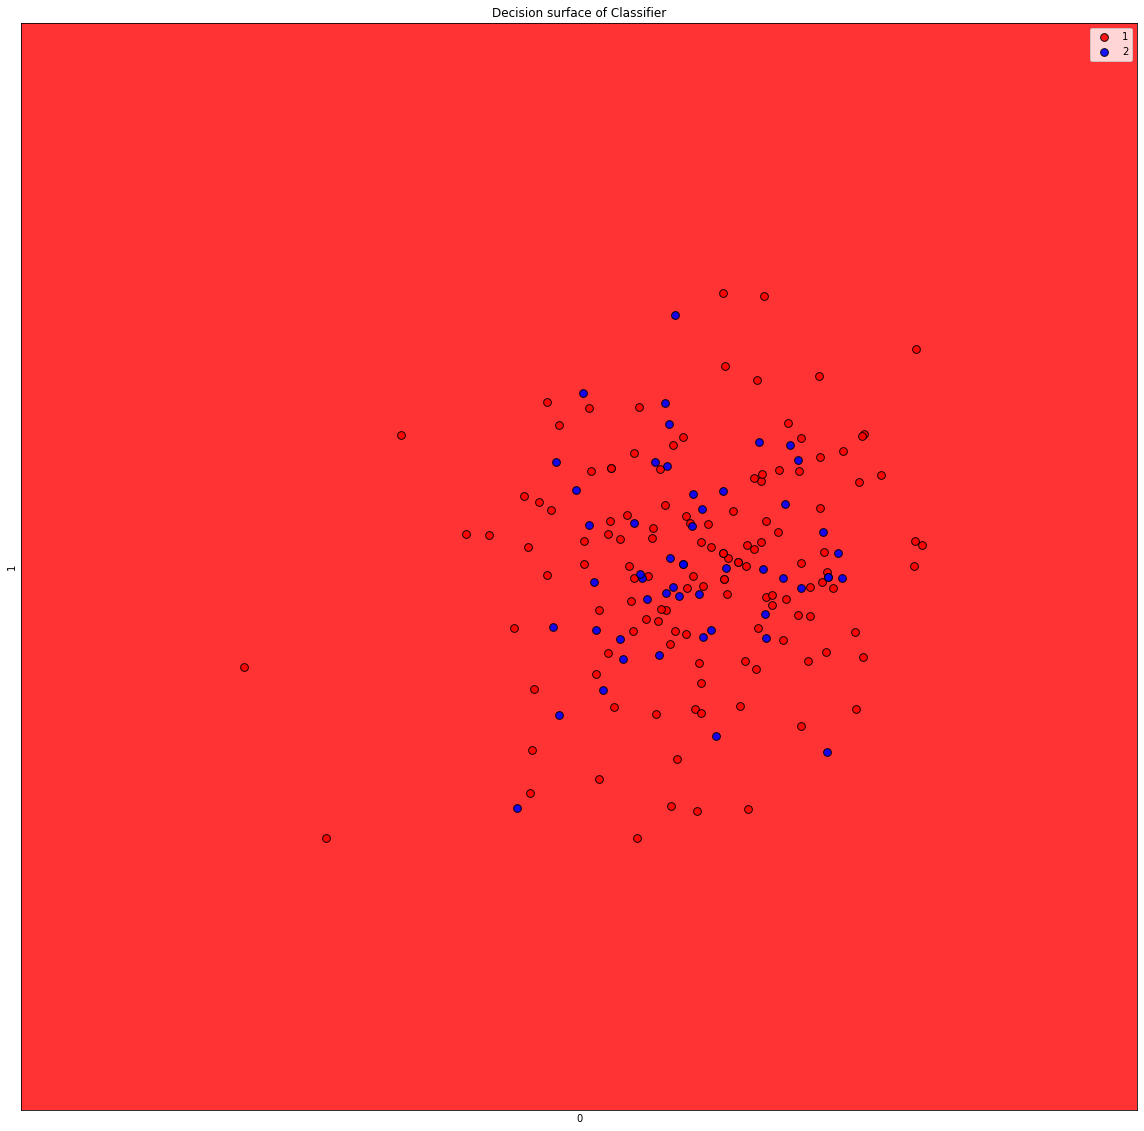

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_clf(clf, X, y, labels):
    fig, ax = plt.subplots(figsize=(20,20))
    # title for the plots
    title = ('Decision surface of Classifier')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                         np.arange(y_min, y_max, .05))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    colours = (['red', 'blue'])
    n_bins = [0.9, 1.9]
    out = ax.contourf(xx, yy, Z, levels = n_bins, alpha=0.8, colors = colours)
    
    ones = ax.scatter(
        X0[y == 1], X1[y == 1],
        c='red', label=labels[1], 
        s=60, alpha=0.9, edgecolors='k')
    twos = ax.scatter(
        X0[y == 2], X1[y == 2],
        c='blue', label=labels[2],
        s=60, alpha=0.9, edgecolors='k')
    
    ax.set_ylabel(labels[1])
    ax.set_xlabel(labels[0])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(2)
pca.fit(x_train)
x_train2 = pca.transform(x_train)

x_train2, y_train2 = np.array(x_train2), np.array(y_train)

labels = ["0", "1", "2", "3", "4", "5", "6", "7" , "8" , "9"]
lr.fit(x_train2, y_train2)
plot_clf(lr, X_train, Y_train, labels)


# Gaussian Naive Bayes


---




Στον gaussian naive bayes θεωρούμε ότι τα δείγματα της κάθε κλάσης ακολουθούν κανονική κατανομή και ότι είναι μεταξύ τους independent identically distributed. Στην φάση της εκπαίδευσης εκτιμώνται οι παράμετροι των γκουσιανών κατανομών και στη συνέχεια τα δείγματα του test συνόλου ταξινομούνται σε κλάσεις με τη λογική του bayes estimation. (Μεγιστοποίηση γινουμένου p(x|ω_i) * p(ω_i))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Out-of-the-box training του GNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
print("Για Out-of-the-box training του GNB έχουμε:\n")
print(classification_report(y_test, pred))

Για Out-of-the-box training του GNB έχουμε:

              precision    recall  f1-score   support

         1.0       0.69      0.78      0.73        40
         2.0       0.10      0.07      0.08        15

    accuracy                           0.58        55
   macro avg       0.39      0.42      0.40        55
weighted avg       0.53      0.58      0.55        55



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

gnb = GaussianNB()
pca = PCA()
selector = VarianceThreshold()
scaler = MinMaxScaler()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('GNB', gnb)])

pipe.fit(x_train,y_train)
preds = pipe.predict(x_test)
print("Μετά το training, για τις default τιμές τoυ pipe θα έχουμε:")
print(f'\tΤο f1 στο test set είναι {f1_score(y_test, preds)}')
print(f'\tΤο accuracy στο test set είναι {accuracy_score(y_test, preds)}')

Μετά το training, για τις default τιμές τoυ pipe θα έχουμε:
	Το f1 στο test set είναι 0.7727272727272727
	Το accuracy στο test set είναι 0.6363636363636364


In [ ]:
print(x_train.var(axis=0))
print("\nΒλέπουμε ότι οι διακυμάνσεις βρίσκονται στο εύρος 0.1 με 0.25 (εξαρτάται και από τα τυχαία δείγματα που θα επιλέξει η train_test_split)")

[0.25338332 0.14322953 0.12005232 0.16809339 0.2294943  0.15297106
 0.20433332 0.15354731 0.25387951 0.19060112 0.12513946 0.11477249]

Βλέπουμε ότι οι διακυμάνσεις βρίσκονται στο εύρος 0.1 με 0.25 (εξαρτάται και από τα τυχαία δείγματα που θα επιλέξει η train_test_split)


In [ ]:
from sklearn.model_selection import GridSearchCV
import time
import warnings
warnings.filterwarnings("ignore")

vthreshold = [0, 0.05, 0.1, 0.14, 0.16, 0.20] 
n_components = [1, 2, 3, 4, 7, 8, 10, 12]
vsmooth = [1e-11, 1e-10, 1e-9, 1e-8] 

print("GridSearchCV με μετρική βελτιστοποίησης, το f1\n")
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, GNB__var_smoothing=vsmooth), cv=10, scoring='f1', n_jobs=-1)
estimator.fit(x_train, y_train)

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('GNB', gnb)])
pipe.set_params(**estimator.best_params_)
start_time = time.time()
pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

start_time = time.time()
preds = pipe.predict(x_test)
print("Συνολικός χρόνος predict: %s seconds" % (time.time() - start_time))
print(f'Ο βελτιστοποιημένος estimator, πέτυχε f1 ίσο με {f1_score(y_test, preds)} και accuracy ίσο με {accuracy_score(y_test, preds)}')
print(f"Για τον βέλτιστο estimator ως προς f1, επιλέχθηκε {estimator.best_params_['GNB__var_smoothing']} για το smoothing του GNB, {estimator.best_params_['pca__n_components']} για τις συνιστώσες του PCA, και {estimator.best_params_['selector__threshold']} για το threshold του VarianceThreshold Selector")

GridSearchCV με μετρική βελτιστοποίησης, το f1

Συνολικός χρόνος fit: 0.0025348663330078125 seconds
Συνολικός χρόνος predict: 0.0007669925689697266 seconds
Ο βελτιστοποιημένος estimator, πέτυχε f1 ίσο με 0.8421052631578948 και accuracy ίσο με 0.7272727272727273
Για τον βέλτιστο estimator ως προς f1, επιλέχθηκε 1e-11 για το smoothing του GNB, 1 για τις συνιστώσες του PCA, και 0 για το threshold του VarianceThreshold Selector


In [ ]:
vthreshold = [0, 0.05, 0.1, 0.14, 0.16, 0.20] 
n_components = [1, 2, 3, 4, 7, 8, 10, 12]
vsmooth = [1e-11, 1e-10, 1e-9, 1e-8] 

print("GridSearchCV με μετρική βελτιστοποίησης, το accuracy\n")
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('GNB', gnb)])
estimator2 = GridSearchCV(pipe2, dict(selector__threshold=vthreshold, pca__n_components=n_components, GNB__var_smoothing=vsmooth), cv=10, scoring='accuracy', n_jobs=-1)
estimator2.fit(x_train, y_train)

pipe2.set_params(**estimator.best_params_)
start_time = time.time()
pipe2.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

start_time = time.time()
preds2 = pipe2.predict(x_test)
print("Συνολικός χρόνος predict: %s seconds" % (time.time() - start_time))
print(f'Ο βελτιστοποιημένος estimator, πέτυχε f1 ίσο με {f1_score(y_test, preds2)} και accuracy ίσο με {accuracy_score(y_test, preds2)}')
print(f"Για τον βέλτιστο estimator ως προς f1, επιλέχθηκε {estimator2.best_params_['GNB__var_smoothing']} για το smoothing του GNB, {estimator2.best_params_['pca__n_components']} για τις συνιστώσες του PCA, και {estimator2.best_params_['selector__threshold']} για το threshold του VarianceThreshold Selector")

GridSearchCV με μετρική βελτιστοποίησης, το accuracy

Συνολικός χρόνος fit: 0.002158641815185547 seconds
Συνολικός χρόνος predict: 0.0007259845733642578 seconds
Ο βελτιστοποιημένος estimator, πέτυχε f1 ίσο με 0.7865168539325843 και accuracy ίσο με 0.6545454545454545
Για τον βέλτιστο estimator ως προς f1, επιλέχθηκε 1e-11 για το smoothing του GNB, 1 για τις συνιστώσες του PCA, και 0 για το threshold του VarianceThreshold Selector


Συνολικά, για τον Gaussian Naive Bayes, είδαμε ότι Oversampling έδινε πολύ κακές επιδόσεις (accuracy < 0.45), πιθανότατα λόγω του μικρού μεγέθος του dataset. Επίσης ο MinMaxScaler, αποδείχθηκε να δίνει τις καλύτερες τιμές, όσον αφορά την κλιμάκωση των χαρακτηριστικών.

#KNeirestNeighbors (kNN)

Ο KNeirestNeighbour ταξινομεί τα δείγματα στην κλάση της πιο συχνής κλάσης των k κοντινότερων δειγμάτων.

Παρακάτω φαίνεται η επίδοση του out-of-the-box kNN ταξινομητή. H default τιμή του k είναι ίση με 5.

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
pred = kNN.predict(x_test)
print("Για Out-of-the-box training του kNN έχουμε:\n")
print(classification_report(y_test, pred))

print(f'Το συνολικό accuracy_score είναι {accuracy_score(y_test, pred)}')
print(f'Το συνολικό f1_score είναι {f1_score(y_test, pred)}')

Για Out-of-the-box training του kNN έχουμε:

              precision    recall  f1-score   support

         1.0       0.72      0.76      0.74        41
         2.0       0.17      0.14      0.15        14

    accuracy                           0.60        55
   macro avg       0.44      0.45      0.45        55
weighted avg       0.58      0.60      0.59        55

Το συνολικό accuracy_score είναι 0.6
Το συνολικό f1_score είναι 0.7380952380952381


Παρατηρούμε ότι στην περίπτωση του out-of-the-box ο ταξινομητής όπως και στις προηγούμενες περιπτώσεις ταξινομητών, ταξινομεί σχεδόν όλα τα δείγματα του test set στην κλάσση 1, με αποτέλεσμα να έχει πολύ κακό accuracy για τα δεδομένα της κλάσσης 2. 

In [11]:
print("Οι προβλέψεις του kNN είναι οι εξής:")
print(pred)

Οι προβλέψεις του kNN είναι οι εξής:
[1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2.]


Στην συνέχεια δημιουργούμε ένα pipeline για την προεπεξεργασία των δεδομένων και ελέγχουμε την απόδοση του. Σε αυτό το σημείο δεν έχουμε βελτιστοποιήσει ακόμα καμία παράμετρο.
Χρησιμοποιούμε: 
1. Variance threshold το οποίο εξαλείφει τα χαρακτηριστικά τα οποία παρουσιάζουν πολύ μικρή διακύμανση με αποτέλεσμα να μην προσφέρουν κάποια πληροφορία.

2. StandardScaler ο οποίος κάνει τον μέσο όρο των features ίσο με 0 και την διακύμανση ίση με 1.

3. RandomOverSampler για την εξισσορόπηση των κλάσεων στο train set

4. PCA για την μείωση της διαστατικότητας



In [ ]:
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report


selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])

pipe.fit(x_train,y_train)

preds = pipe.predict(x_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

         1.0       0.79      0.52      0.63        42
         2.0       0.26      0.54      0.35        13

    accuracy                           0.53        55
   macro avg       0.52      0.53      0.49        55
weighted avg       0.66      0.53      0.56        55



In [ ]:
print(f'Το συνολικό f1_score είναι {f1_score(y_test, preds)}')
print(f'Το συνολικό accuracy είναι {accuracy_score(y_test, preds)}')

Το συνολικό f1_score είναι 0.7246376811594204
Το συνολικό accuracy είναι 0.6545454545454545


Παρατηρούμε ότι βελτιώνεται το accuracy, αλλά μειώνεται το f1 score.

Στην συνέχεια θα προσπαθήσουμε να βελτιστοποιήσουμε τις παραμέτρους του pipeline με τη χρήση του gridsearch

In [ ]:
vthreshold = [0, 0.01, 0.05, 0.08, 0.1, 0.13]
n_components = [1, 2, 3, 4, 7, 9, 12]
sampling_strategy = [0.7, 0.8, 0.9, 0.95, 1.0]
metric_ = ['euclidean', 'minkowski', 'manhattan']
k = [1, 2, 3, 4 , 10]

pipe = Pipeline(steps=[('ros', ros),('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])


estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, ros__sampling_strategy = sampling_strategy, pca__n_components=n_components, kNN__metric = metric_, kNN__n_neighbors=k), cv=10, scoring='accuracy', n_jobs=-1)

import time

estimator.fit(x_train, y_train)
pipe = Pipeline(steps=[('ros', ros),('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])
pipe.set_params(**estimator.best_params_)
start_time = time.time()
pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

start_time = time.time()
preds = pipe.predict(x_test)
print("Συνολικός χρόνος predict: %s seconds" % (time.time() - start_time))


print(classification_report(y_test, preds))
print(estimator.best_params_)

Συνολικός χρόνος fit: 0.0029854774475097656 seconds
Συνολικός χρόνος predict: 0.10553956031799316 seconds
              precision    recall  f1-score   support

         1.0       0.76      0.62      0.68        42
         2.0       0.24      0.38      0.29        13

    accuracy                           0.56        55
   macro avg       0.50      0.50      0.49        55
weighted avg       0.64      0.56      0.59        55

{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 2, 'pca__n_components': 1, 'ros__sampling_strategy': 0.8, 'selector__threshold': 0.13}


In [ ]:
print(f'Το συνολικό f1_score είναι {f1_score(y_test, preds)}')
print(f'Το συνολικό accuracy είναι {accuracy_score(y_test, preds)}')

Το συνολικό f1_score είναι 0.6842105263157895
Το συνολικό accuracy είναι 0.5636363636363636


Παρατηρούμε ότι τόσο το accuracy όσο και το f1_score μειώθηκαν από την out-of-the-box επίδοση. Ενδιαφερόν είναι ότι βέλτιστο αποτέλεσμα δίνει η περίπτωση που ο PCA κρατάει μόνο μια διάσταση. Αυτό οφείλεται στο γεγονός ότι τα δείγματα είναι πολύ λίγα. Στην συνέχεια δοκιμάζουμε grid-search με στόχο την βελτιστοποίηση της μετρικής f1.

In [ ]:
vthreshold = [0, 0.01, 0.05, 0.08, 0.1, 0.13]
n_components = [1, 2, 3, 4, 7, 9, 12]
sampling_strategy = [0.7, 0.8, 0.9, 0.95, 1.0]
metric_ = ['euclidean', 'minkowski', 'manhattan']
k = [1, 2, 3, 4 , 10]

pipe = Pipeline(steps=[('ros', ros),('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])


estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, ros__sampling_strategy = sampling_strategy, pca__n_components=n_components, kNN__metric = metric_, kNN__n_neighbors=k), cv=10, scoring='f1', n_jobs=-1)

import time

estimator.fit(x_train, y_train)
pipe = Pipeline(steps=[('ros', ros),('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])
pipe.set_params(**estimator.best_params_)
start_time = time.time()
pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

start_time = time.time()
preds = pipe.predict(x_test)
print("Συνολικός χρόνος predict: %s seconds" % (time.time() - start_time))


print(classification_report(y_test, preds))
print(estimator.best_params_)

Συνολικός χρόνος fit: 0.003192901611328125 seconds
Συνολικός χρόνος predict: 0.10592913627624512 seconds
              precision    recall  f1-score   support

         1.0       0.79      0.71      0.75        42
         2.0       0.29      0.38      0.33        13

    accuracy                           0.64        55
   macro avg       0.54      0.55      0.54        55
weighted avg       0.67      0.64      0.65        55

{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 2, 'pca__n_components': 2, 'ros__sampling_strategy': 0.7, 'selector__threshold': 0.13}


In [ ]:
print(f'Το συνολικό f1_score είναι {f1_score(y_test, preds)}')
print(f'Το συνολικό accuracy είναι {accuracy_score(y_test, preds)}')

Το συνολικό f1_score είναι 0.71875
Το συνολικό accuracy είναι 0.6727272727272727


Σε αυτή την περίπτωση το accuracy αυξήθηκε κατα 2% περίπου από την περίπτωση του pipe-line με τις default τιμές και το f1 έπεσε ελαφρώς. Πάλι ο PCA κράτησε μόνο δύο διαστάσεις. Παρατηρούμε επίσης ότι επιλέγεται το μέγιστο κατώφλι διακύμανσης που έχουμε βάλει, επομένως δοκιμάζουμε και μεγαλύτερες τιμές. Δοκιμάζουμε επίσης και ως scaler τον MinMaxScaler που φάνηκε στους προηγούμενους ταξινομητές να εμφανίζει καλά αποτελέσματα.

In [ ]:
vthreshold = [0.15, 0.17, 0.19, 0.21]
n_components = [1, 2, 3]
sampling_strategy = [0.7, 0.8, 0.9, 0.95, 1.0]
metric_ = ['euclidean', 'minkowski', 'manhattan']
k = [1, 2, 3, 4]
scaler = MinMaxScaler()

pipe = Pipeline(steps=[('ros', ros),('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])


estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, ros__sampling_strategy = sampling_strategy, pca__n_components=n_components, kNN__metric = metric_, kNN__n_neighbors=k), cv=10, scoring='f1', n_jobs=-1)

import time

estimator.fit(x_train, y_train)
pipe = Pipeline(steps=[('ros', ros),('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])
pipe.set_params(**estimator.best_params_)
start_time = time.time()
pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

start_time = time.time()
preds = pipe.predict(x_test)
print("Συνολικός χρόνος predict: %s seconds" % (time.time() - start_time))


print(classification_report(y_test, preds))
print(estimator.best_params_)

Συνολικός χρόνος fit: 0.002900362014770508 seconds
Συνολικός χρόνος predict: 0.10488486289978027 seconds
              precision    recall  f1-score   support

         1.0       0.64      0.74      0.68        34
         2.0       0.44      0.33      0.38        21

    accuracy                           0.58        55
   macro avg       0.54      0.53      0.53        55
weighted avg       0.56      0.58      0.57        55

{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 2, 'pca__n_components': 1, 'ros__sampling_strategy': 0.8, 'selector__threshold': 0.17}


In [ ]:
print(f'Το συνολικό f1_score είναι {f1_score(y_test, preds)}')
print(f'Το συνολικό accuracy είναι {accuracy_score(y_test, preds)}')

Το συνολικό f1_score είναι 0.6849315068493151
Το συνολικό accuracy είναι 0.5818181818181818


Προέκυψαν χειρότερα αποτελέσματα, από ότι παραπάνω. Δοκιμάζουμε παρακάτω με τις ίδιες παραμέτρους grid-search με στόχο την μεγιστοποίηση του accuracy.

In [ ]:
vthreshold = [0.15, 0.17, 0.19, 0.21]
n_components = [1, 2, 3]
sampling_strategy = [0.7, 0.8, 0.9, 0.95, 1.0]
metric_ = ['euclidean', 'minkowski', 'manhattan']
k = [1, 2, 3, 4]
scaler = MinMaxScaler()

pipe = Pipeline(steps=[('ros', ros),('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])


estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, ros__sampling_strategy = sampling_strategy, pca__n_components=n_components, kNN__metric = metric_, kNN__n_neighbors=k), cv=10, scoring='accuracy', n_jobs=-1)

import time

estimator.fit(x_train, y_train)
pipe = Pipeline(steps=[('ros', ros),('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])
pipe.set_params(**estimator.best_params_)
start_time = time.time()
pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

start_time = time.time()
preds = pipe.predict(x_test)
print("Συνολικός χρόνος predict: %s seconds" % (time.time() - start_time))


print(classification_report(y_test, preds))
print(estimator.best_params_)

Συνολικός χρόνος fit: 0.0029218196868896484 seconds
Συνολικός χρόνος predict: 0.10706067085266113 seconds
              precision    recall  f1-score   support

         1.0       0.64      0.85      0.73        34
         2.0       0.50      0.24      0.32        21

    accuracy                           0.62        55
   macro avg       0.57      0.55      0.53        55
weighted avg       0.59      0.62      0.58        55

{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 2, 'pca__n_components': 1, 'ros__sampling_strategy': 0.7, 'selector__threshold': 0.19}


In [ ]:
print(f'Το συνολικό f1_score είναι {f1_score(y_test, preds)}')
print(f'Το συνολικό accuracy είναι {accuracy_score(y_test, preds)}')

Το συνολικό f1_score είναι 0.7341772151898734
Το συνολικό accuracy είναι 0.6181818181818182


Παρατηρούμε ότι προκύπτουν ελαφρώς καλύτερα αποτελέσματα. Δοκιμάζουμε ξανά τον StandardScaler.

In [ ]:
scaler = StandardScaler()
vthreshold = [0.15, 0.17, 0.19, 0.21]
n_components = [1, 2, 3]
sampling_strategy = [0.7, 0.8, 0.9, 0.95]
metric_ = ['euclidean', 'minkowski', 'manhattan']
k = [1, 2, 3]


pipe = Pipeline(steps=[('ros', ros),('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])


estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, ros__sampling_strategy = sampling_strategy, pca__n_components=n_components, kNN__metric = metric_, kNN__n_neighbors=k), cv=10, scoring='f1', n_jobs=-1)

import time

estimator.fit(x_train, y_train)
pipe = Pipeline(steps=[('ros', ros),('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])
pipe.set_params(**estimator.best_params_)
start_time = time.time()
pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

start_time = time.time()
preds = pipe.predict(x_test)
print("Συνολικός χρόνος predict: %s seconds" % (time.time() - start_time))


print(classification_report(y_test, preds))
print(estimator.best_params_)

Συνολικός χρόνος fit: 0.0030908584594726562 seconds
Συνολικός χρόνος predict: 0.10790348052978516 seconds
              precision    recall  f1-score   support

         1.0       0.65      0.82      0.73        34
         2.0       0.50      0.29      0.36        21

    accuracy                           0.62        55
   macro avg       0.58      0.55      0.55        55
weighted avg       0.59      0.62      0.59        55

{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 2, 'pca__n_components': 1, 'ros__sampling_strategy': 0.7, 'selector__threshold': 0.19}


In [ ]:
print(f'Το συνολικό f1_score είναι {f1_score(y_test, preds)}')
print(f'Το συνολικό accuracy είναι {accuracy_score(y_test, preds)}')

Το συνολικό f1_score είναι 0.7272727272727273
Το συνολικό accuracy είναι 0.6181818181818182


Παρατηρούμε ότι τα αποτελέσματα είναι παρόμοια. Καταλήγουμε λοιπόν ότι οι καλύτεροι παράμετροι είναι οι εξής: <br>
kNN__metric: 'manhattan' <br>
kNN__n_neighbors: 2  <br>
pca__n_components': 2 <br>
ros__sampling_strategy: 0.7 <br>
selector__threshold: 0.13




In [ ]:
selector = VarianceThreshold(threshold=0.13)
scaler = StandardScaler()
ros = RandomOverSampler(sampling_strategy = 0.7)
pca = PCA(n_components=2)
clf = KNeighborsClassifier(metric= 'manhattan',n_neighbors = 2,n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])

start_time = time.time()

pipe.fit(x_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

start_time = time.time()
preds = pipe.predict(x_test)
print("Συνολικός χρόνος predict: %s seconds" % (time.time() - start_time))


print(classification_report(y_test, preds))
print(f'Το συνολικό f1_score είναι {f1_score(y_test, preds)}')
print(f'Το συνολικό accuracy είναι {accuracy_score(y_test, preds)}')

Συνολικός χρόνος fit: 0.00439453125 seconds
Συνολικός χρόνος predict: 0.1051790714263916 seconds
              precision    recall  f1-score   support

         1.0       0.67      0.85      0.75        34
         2.0       0.58      0.33      0.42        21

    accuracy                           0.65        55
   macro avg       0.63      0.59      0.59        55
weighted avg       0.64      0.65      0.63        55

Το συνολικό f1_score είναι 0.7532467532467532
Το συνολικό accuracy είναι 0.6545454545454545


Παρατηρούμε ότι το αποτέλεσμα είναι πολύ παρόμοιο με αυτό της υλοποίησης out-of-the-box ή του pipeline όπου γίνεται προεπεξεργασία των δεδομένων με default τιμές στα στρώματα. Παρατηρήσαμε επίσης ότι στο grid-search υπάρχει μια τυχαιότητα, καθώς οι βέλτιστοι παράμεροι που βγάζει εμφανίζουν μικρές παραλλαγές ανάλογα με την διαχωρισμό του train και του test set.

#Σύγκριση αποτελεσμάτων


Σε αυτό το μέρος θα συγκρίνουμε τις επιδοσεις των ταξινομητών όπως προέκυψαν παραπάνω. Ξεκινάμε απο τίς out-of-the-box επιδόσεις τους.

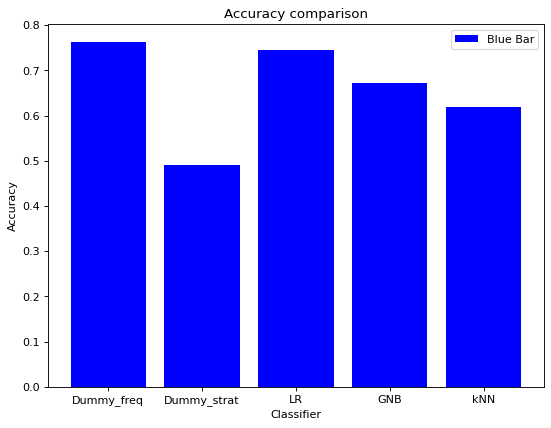

In [ ]:
dummy_freq = DummyClassifier(strategy="most_frequent")
dummy_freq.fit(x_train, y_train)
preds_dummy_freq = dummy_freq.predict(x_test)


dummy_str = DummyClassifier(strategy="stratified")
dummy_str.fit(x_train, y_train)
preds_dummy_str = dummy_str.predict(x_test)

logistic = LogisticRegression()
logistic.fit(x_train, y_train)
preds_logistic = logistic.predict(x_test)

gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_gnb = gnb.predict(x_test)

kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
pred_kNN = kNN.predict(x_test)

import matplotlib.pyplot as plt

x1 = ['Dummy_freq', 'Dummy_strat', 'LR', 'GNB', 'kNN']
y1 = [accuracy_score(preds_dummy_freq, y_test), accuracy_score(preds_dummy_str, y_test), accuracy_score(preds_logistic, y_test), accuracy_score(pred_gnb, y_test), accuracy_score(pred_kNN, y_test)]

acc_dummy_freq = accuracy_score(preds_dummy_freq, y_test)
acc_dummy_str = accuracy_score(preds_dummy_str, y_test)
acc_lr = accuracy_score(preds_logistic, y_test)
acc_gnb = accuracy_score(pred_gnb, y_test)
acc_kNN = accuracy_score(pred_kNN, y_test)

f1_dummy_freq = f1_score(preds_dummy_freq, y_test)
f1_dummy_str = f1_score(preds_dummy_str, y_test)
f1_lr = f1_score(preds_logistic, y_test)
f1_gnb = f1_score(pred_gnb, y_test)
f1_kNN = f1_score(pred_kNN, y_test)

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.bar(x1, y1, label="Blue Bar", color='b')

plt.plot()

plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy comparison")
plt.legend()
plt.show()


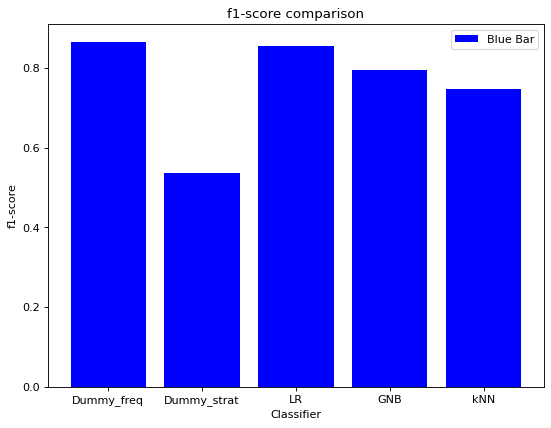

In [ ]:
x1 = ['Dummy_freq', 'Dummy_strat', 'LR', 'GNB', 'kNN']
y1 = [f1_score(preds_dummy_freq, y_test), f1_score(preds_dummy_str, y_test), f1_score(preds_logistic, y_test), f1_score(pred_gnb, y_test), f1_score(pred_kNN, y_test)]


from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.bar(x1, y1, label="Blue Bar", color='b')

plt.plot()

plt.xlabel("Classifier")
plt.ylabel("f1-score")
plt.title("f1-score comparison")
plt.legend()
plt.show()

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
'''
print("Dummy_freq:")
print("F1: {}".format(f1_score(preds_dummy_freq, y_test)))
print("Accuracy: {}".format(accuracy_score(preds_dummy_freq, y_test)))

print("Dummy_strat:")
print("F1: {}".format(f1_score(preds_dummy_str, y_test)))
print("Accuracy: {}".format(accuracy_score(preds_dummy_str, y_test)))

print("Logistic Regression")
print("F1: {}".format(f1_score(preds_logistic, y_test)))
print("Accuracy: {}".format(accuracy_score(preds_logistic, y_test)))
print("GNB")
print("F1: {}".format(f1_score(pred_gnb, y_test)))
print("Accuracy: {}".format(accuracy_score(pred_gnb, y_test)))
print("kNN")
print("F1: {}".format(f1_score(pred_kNN, y_test)))
print("Accuracy: {}".format(accuracy_score(pred_kNN, y_test)))
'''

from sklearn.metrics import accuracy_score, f1_score
markdown = """Out-of-the-box-classifiers  | Accuracy | F1-score
------------- | ------------- | ------------"""
classifierss = ['Dummy(Most frequent strategy)', 'Dummy(Stratified Strategy)', 'Logistic Regression', 'GNB', 'kNN']
predicts = [preds_dummy_freq, preds_dummy_str, preds_logistic, pred_gnb, pred_kNN]

for i in range(5):
    acc = accuracy_score(predicts[i], y_test)
    f1 = f1_score(predicts[i], y_test)
    markdown += """
     {} | {} | {}""".format(classifierss[i], round(acc,3), round(f1,3))
printmd(markdown)

Out-of-the-box-classifiers  | Accuracy | F1-score
------------- | ------------- | ------------
     Dummy(Most frequent strategy) | 0.764 | 0.866
     Dummy(Stratified Strategy) | 0.545 | 0.675
     Logistic Regression | 0.745 | 0.854
     GNB | 0.673 | 0.795
     kNN | 0.618 | 0.747




Παρατηρούμε, λοιπόν από τα bar plots και από τον παραπάνω πίνακα ότι ο dummy classifier με την most frequent στρατηγική και ο LR έχουν την καλύτερη επίδοση για την out-of-the-box υλοποίηση.

Τώρα θα συγκρίνουμε τις επιδόσεις των pipelines που έχουν δημιουργηθεί για κάθε ταξινομητή με βέλτιστες παραμέτρους των στρωμάτων που βρέθηκαν παραπάνω.

In [ ]:
import time

selector = VarianceThreshold(threshold=0)
scaler = StandardScaler()
mmscaler = MinMaxScaler()
ros = RandomOverSampler()
pca = PCA(n_components=2)
sm = SMOTE()

dummy = DummyClassifier(strategy='most_frequent')
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sm', sm), ('pca', pca), ('dummy', dummy)])
start_time = time.time()
pipe.fit(x_train,y_train)
train_time_dummy_freq = time.time() - start_time

start_time = time.time()
preds_dummy_freq = pipe.predict(x_test)
test_time_dummy_freq = time.time() - start_time

selector = VarianceThreshold(threshold=0.01)
scaler = StandardScaler()
mmscaler = MinMaxScaler()
ros = RandomOverSampler(sampling_strategy=0.8)
pca = PCA(n_components=6)
sm = SMOTE()


dummy = DummyClassifier(strategy='stratified')
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('ros', ros), ('pca', pca), ('dummy', dummy)])

start_time = time.time()
pipe.fit(x_train, y_train)
train_time_dummy_str = time.time() - start_time

start_time = time.time()
preds_dummy_str = pipe.predict(x_test)
test_time_dummy_str = time.time() - start_time

selector = VarianceThreshold(threshold=0)
scaler = StandardScaler()
mmscaler = MinMaxScaler()
ros = RandomOverSampler(sampling_strategy=0.7)
pca = PCA(n_components=2)
sm = SMOTE()

lr = LogisticRegression(C=0.01)
pipe = Pipeline(steps=[('selector', selector), ('scaler', mmscaler), ('ros', ros), ('pca', pca), ('lr', lr)])
start_time = time.time()
pipe.fit(x_train, y_train)
train_time_lr = time.time() - start_time

start_time = time.time()
preds_lr = pipe.predict(x_test)
test_time_lr = time.time() - start_time

gnb = GaussianNB(var_smoothing=1e-11)
pca = PCA(10)
selector = VarianceThreshold(0.1)
scaler = MinMaxScaler()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('GNB', gnb)])
start_time = time.time()
pipe.fit(x_train, y_train)
train_time_gnb = time.time() - start_time

start_time = time.time()
preds_gnb = pipe.predict(x_test)
test_time_gnb = time.time() - start_time

selector = VarianceThreshold(threshold=0.13)
scaler = StandardScaler()
ros = RandomOverSampler(sampling_strategy = 0.7)
pca = PCA(n_components=2)
clf = KNeighborsClassifier(metric= 'manhattan',n_neighbors = 2,n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])

start_time = time.time()
pipe.fit(x_train, y_train)
train_time_kNN = time.time() - start_time

start_time = time.time()
preds_kNN = pipe.predict(x_test)
test_time_kNN = time.time() - start_time
'''
print("Dummy_freq:")
print("F1: {}".format(f1_score(preds_dummy_freq, y_test)))
print("Accuracy: {}".format(accuracy_score(preds_dummy_freq, y_test)))
print("Train time: {}".format(train_time_dummy_freq))
print("Test time: {}".format(test_time_dummy_freq))

print("Dummy_strat:")
print("F1: {}".format(f1_score(preds_dummy_str, y_test)))
print("Accuracy: {}".format(accuracy_score(preds_dummy_str, y_test)))
print("Train time: {}".format(train_time_dummy_str))
print("Test time: {}".format(test_time_dummy_str))

print("Logistic Regression")
print("F1: {}".format(f1_score(preds_lr, y_test)))
print("Accuracy: {}".format(accuracy_score(preds_lr, y_test)))
print("Train time: {}".format(train_time_lr))
print("Test time: {}".format(test_time_lr))

print("GNB")
print("F1: {}".format(f1_score(preds_gnb, y_test)))
print("Accuracy: {}".format(accuracy_score(preds_gnb, y_test)))
print("Train time: {}".format(train_time_gnb))
print("Test time: {}".format(test_time_gnb))

print("kNN")
print("F1: {}".format(f1_score(preds_kNN, y_test)))
print("Accuracy: {}".format(accuracy_score(preds_kNN, y_test)))
print("Train time: {}".format(train_time_kNN))
print("Test time: {}".format(test_time_kNN))
'''

markdown = """Classifiers  | Accuracy | f1-score | Train Time | Test Time
------------- | ------------- | ------------|---------------|-------------"""
classifierss = ['Dummy(Most frequent strategy)', 'Dummy(Stratified Strategy)', 'Logistic Regression', 'GNB', 'kNN']
predicts = [preds_dummy_freq, preds_dummy_str, preds_lr, preds_gnb, preds_kNN]
train_times = [train_time_dummy_freq, train_time_dummy_str, train_time_lr, train_time_gnb, train_time_kNN]
test_times = [test_time_dummy_freq, test_time_dummy_str, test_time_lr, test_time_gnb, test_time_kNN]

for i in range(5):
    acc = accuracy_score(predicts[i], y_test)
    f1 = f1_score(predicts[i], y_test)
    markdown += """
     {} | {} | {} | {} | {}""".format(classifierss[i], round(acc,3), round(f1,3), round(train_times[i],4), round(test_times[i],5))
printmd(markdown)

Classifiers  | Accuracy | f1-score | Train Time | Test Time
------------- | ------------- | ------------|---------------|-------------
     Dummy(Most frequent strategy) | 0.764 | 0.866 | 0.0043 | 0.00049
     Dummy(Stratified Strategy) | 0.436 | 0.537 | 0.0025 | 0.00059
     Logistic Regression | 0.764 | 0.866 | 0.0045 | 0.00055
     GNB | 0.745 | 0.841 | 0.002 | 0.00063
     kNN | 0.691 | 0.805 | 0.0027 | 0.10447

Παρατητούμε ότι όλοι οι ταξινομητές πλην του Dummy με stratified strategy εμφανίζουν παρόμοι acuracies. Ο kNN εμφανίζει το μικρότερο. Βλέπουμε επίσης ότι έχει και το μεγαλύτερο Test Time, επαληθεύοντας ότι ο kNN είναι υπολογιστικά βαρύς στο testing.

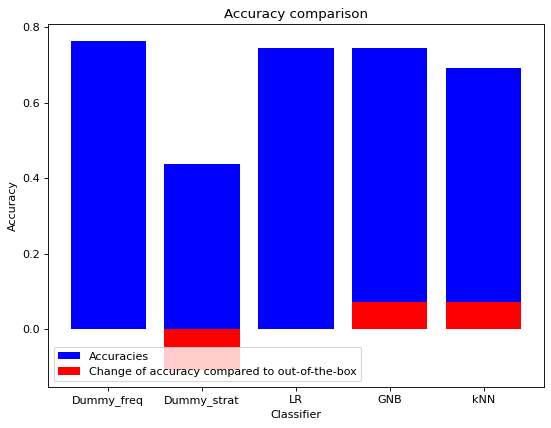

In [ ]:
# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = ['Dummy_freq', 'Dummy_strat', 'LR', 'GNB', 'kNN']
y1 = [accuracy_score(preds_dummy_freq, y_test), accuracy_score(preds_dummy_str, y_test), accuracy_score(preds_logistic, y_test), accuracy_score(preds_gnb, y_test), accuracy_score(preds_kNN, y_test)]

y2 = [acc_dummy_freq, acc_dummy_str, acc_lr, acc_gnb, acc_kNN]

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.bar(x1, y1, label="Accuracies", color='b')
#plt.bar(x1, y2, label = 'Accuracy of out-of-the-box', color='r')
plt.bar(x1, [a - b for a, b in zip(y1, y2)], label= 'Change of accuracy compared to out-of-the-box', color='r')
plt.plot()

plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy comparison")
plt.legend()
plt.show()

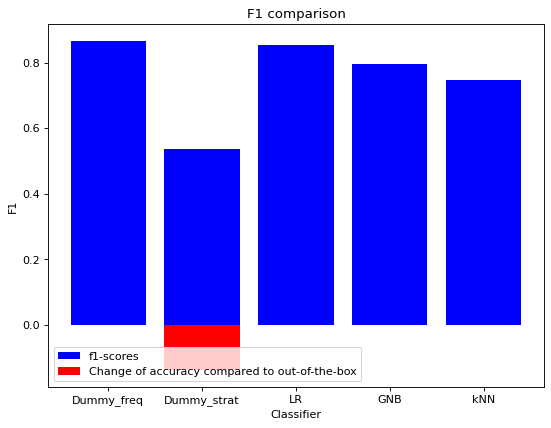

In [ ]:
x1 = ['Dummy_freq', 'Dummy_strat', 'LR', 'GNB', 'kNN']
y1 = [f1_score(preds_dummy_freq, y_test), f1_score(preds_dummy_str, y_test), f1_score(preds_logistic, y_test), f1_score(pred_gnb, y_test), f1_score(pred_kNN, y_test)]
y2 = [f1_dummy_freq, f1_dummy_str, f1_lr, f1_gnb, f1_kNN]

# Colors: https://matplotlib.org/api/colors_api.html
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.bar(x1, y1, label="f1-scores", color='b')
#plt.bar(x1, y2, label = 'Accuracy of out-of-the-box', color='r')
plt.bar(x1, [a - b for a, b in zip(y1, y2)], label= 'Change of accuracy compared to out-of-the-box', color='r')

plt.plot()

plt.xlabel("Classifier")
plt.ylabel("F1")
plt.title("F1 comparison")
plt.legend()
plt.show()


Ο καλύτερος ταξινομητής προκύπτει ότι είναι ο Logistic Regression Classifier και ο χειρότερος ο kNN Classifier. Παρακάτω ακολουθούν ο πίνακας σύγχυσης του καθενός. Στους πίνακες σύγχυσης αναφέρεται ως positive να έχει επιλεχθεί η κλάση δύο. Δηλάδη: <br>
1. True Negative: Έχει εκτιμηθεί σωστά δείγμα της πρώτη κλάση.
2. False Negative: Έχει εκτιμηθεί λάθος δείγμα της δεύτερης κλάσης ως αντικείμενο της πρώτης.
3. False Positive: Έχει εκτιμηθεί λάθος δείγμα της πρώτης κλάσης ως αντικείμενο της δεύτερης.
4. True Positive: Έχει εκτιμηθεί σωστά δείγμα της δεύτερης κλάσης.

Ο πίνακας σύγχυσης του Logistic Regression


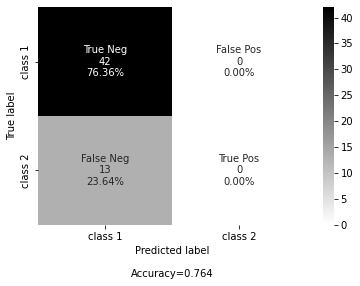

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, preds_lr)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['class 1', 'class 2']
import seaborn as sns
print("Ο πίνακας σύγχυσης του Logistic Regression")
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [ ]:
print(preds_lr)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


Παρατηρούμε ότι δεν έχει εκτιθμηθεί κανένα δείγμα ως αντικείμενο της δεύτερης κλάσης και για αυτό το False Positive και το True Positive είναι μηδενικά. Επιτυγχάνεται λοιπόν αυτό το accuracy, διότι τα περισσότερα δείγματα του test set (76%) ανήκουν στην πρώτη κλάση και αν ο classifier τα εκτιμά όλα ως 1, επιτυγχάνει αυτό το ποσοστό. Προφανώς αυτή είναι μια προβληματική προσέγγιση, αλλά δυστυχώς εμφανίζει τα καλύτερα αποτελέσματα σε αυτό το σύνολο δεδομένων, αφού αυτό είναι πολυ imbalanced και περιέχει πολύ λίγα δείγματα ώστε να γίνει καλύτερη εκπαίδευση.

Ο πίνακας σύγχυσης του kNN


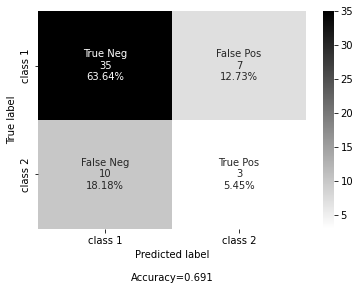

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, preds_kNN)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['class 1', 'class 2']
import seaborn as sns
print("Ο πίνακας σύγχυσης του kNN")
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

Σε αυτή την περίπτωση δειγματα εκτιμούνται ότι ανήκουν στην κλάση 2, το οποίο είναι πιο φυσιολογικό. Παρόλα αυτά επιτυγχάνεται πολύ μικρό ποσοστό σωστών προβλέψεων της κλάσης 2 (γύρω στο 5%), ενώ μειώνεται και το ποσοστό επιτυχών προβλέψεων δειγμάτων της κλάσης 1 (Περίπου 63%). 

#Συμπέρασμα
Γενίκα το συγκεκριμένο σύνολο δεδομένων έχει πολύ λίγα δείγματα και είναι αρκετά imbalanced, καθώς τα περισσότερα δείγματα ανήκουν στην κλάση 1. Επομένων, είναι δύσκολη η αποτελεσματική εκπαίδευση ενός ταξινομητή, ειδικά ώστε να εντοπίζει επιτυχώς δείγματα που ανήκουν στην κλάση 2. Τα καλύτερα αποτελέσματα φαίνεται ότι εμφανίζουν οι dummy classifiers, οι οποίοι εκτιμούν μόνο την κλάση 1 καθώς και ο logistic regression classifier, όταν εκτιμά όλα τα δειγματα στην κλάση 1. Είναι φανερό ότι αυτός δεν είναι ένας επιθυμητός ταξινομητής καθώς είναι υπεραπλουστευτικός και απλά επιτυγχάνει σχετικά μεγάλο accuracy γιατί είναι πιο πιθανή η κατάσταση του relax από το planning. Επομένως, αν καλούμασταν να προτείνουμε κάποιον από τους ταξινομητές, θα ήταν ένας από αυτούς, γνωρίζοντας όμως αυτή την λεπτομέρεια. 